<center><img src="https://miro.medium.com/v2/resize:fit:1250/format:webp/1*QgI1t-7yJApi4vQigFgsLQ.jpeg" width=30% ></center>

# <center> Lab Project Part 1: Image Classification using Bag-of-Words </center>
<center> Computer Vision 1, University of Amsterdam </center>
<center> Due 23:59, October 21, 2023 (Amsterdam time) </center>

***

<center>
<b>TA's: Qi Bi, Avik Pal, Nimi Barazani</b>

Student1 ID: \
Student1 Name:

Student2 ID: \
Student2 Name:

Student3 ID: \
Student3 Name:

( Student4 ID: \
Student4 Name: )
</center>

# **Instructions**

1. For both parts of the final project, students are expected to prepare a report. The report should include answers to all questions, written details on implementation approaches, the analysis of the results for different settings and visualizations to illustrate experiments with and performance of your implementation. Grading will primarily be based on the report (i.e. it should be self-contained as much as possible). If the report contains any faulty results or ambiguities, the TA's can take a look at your code to find out what happened.

2. Do not just provide numbers without explanation, remember to follow the general guidelines and discuss different settings to show you understand the material and the processes at work.

3. For qualitative evaluation, you are expected to visualize the top-5 and the bottom-5 ranked test images (based on the classifier confidence for the target class) per setup. That means you are supposed to provide a figure for each experimental setup, as discussed in Section 2.6.

**Hint:** Having visual elements such as charts, graphs and plots are always useful for everyone. Keep this in mind while writing your reports.


# **General Guidelines**
1. Aim:
    - Able to understand the basic Image Recognition/Classification pipeline using a traditional Bag of Words method.
    - Able to use to python packages for image classification: *matplotlib, cv2, sklearn etc.*
2. Prerequisite:
    - Familiarity with Python and relevant packages.
    - Know the basics of feature descriptors (SIFT, HoG) and machine learning tools (K-means, SVM and etc.).
3. Guidelines:
    Students should work on the assignments in their assignment group for **two** weeks.

    Any questions regarding the assignment content can be discussed on Piazza.
    
    Your source code and report must be handed in together in a zip file (**ID1_ID2_ID3_part1.zip**) before the deadline. Make sure your report follows these guidelines:
    - *The maximum number of pages for this part is 10 (single-column, including tables and figures). Please express your thoughts concisely.*
    - *Follow the given instructions and answer all given questions. Briefly describe what you implemented.*
    - *Show you understand the algorithms and implementations: explain why certain settings produce certain results. When constructing graphs, tables and other figures, make your figures as informative as possible (choose relevant sample sizes, axes, etc.), to illustrate your arguments*
    - *Tables and figures must be accompanied by a brief description. Do not forget to add a number, a title, and if applicable name and unit of variables in a table, name and unit of axes and legends in a figure.*

4. The report should be handed in in **PDF-format**. Your code should be handed in in **.ipynb format**. This does not mean you have to make your project in a notebook, it just means it **should be submitted as a notebook**. Be sure to test whether all your functionality works as expected when ran in a notebook. If you use a Conda environment, be sure to include it in your submission.

5. **Late submissions** are not allowed. Assignments that are submitted after the strict deadline will not be graded. In case of submission conflicts, TAs' system clock is taken as reference. We strongly recommend submitting well in advance, to avoid last minute system failure issues.
6. **Plagiarism note**:
Keep in mind that plagiarism (submitted materials which are not your work) is a serious crime and any misconduct shall be punished with the university regulations.
This includes the use of ChatGPT and other generative AI tools.

<!-- ### PyTorch versions
we assume that you are using latest PyTorch version(>=1.4)

### PyTorch Tutorial & Docs
This tutorial aims to make you familiar with the programming environment that will be used throughout the course. If you have experience with PyTorch or other frameworks (TensorFlow, MXNet *etc.*), you can skip the tutorial exercises; otherwise, we suggest that you complete them all, as they are helpful for getting hands-on experience.

**Anaconda Environment** We recommend installing \textit{anaconda} for configuring \textit{python} package dependencies, whereas it's also fine to use other environment managers as you like. The installation of anaconda can be found in [anaconda link](https://docs.anaconda.com/anaconda/install/).

**Installation** The installation of PyTorch is available at [install link](https://pytorch.org/get-started/locally/) depending on your device and system.

**Getting start** The 60-minute blitz can be found at [blitz](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html), and and examples are at [examples](https://pytorch.org/tutorials/beginner/pytorch_with_examples.html)

**Documents** There might be potential unknown functions or classes, you shall look through the official documents website ([Docs](https://pytorch.org/docs/stable/index.html)) and figure them out by yourself. (***Think***:} What's the difference between *torch.nn.Conv2d* and *torch.nn.functional.conv2d*?)
You can learn pytorch from the [tutorial link](https://pytorch.org/tutorials/). The Docs information can be searched at [Docs](https://pytorch.org/docs/stable/index.html). In this assignments, we wish you to form the basic capability of using one of the well-known   -->

# **1. Introduction**

The goal of the assignment is to implement a system for image classification. In other words, this system should tell if there is an object of given class in an image. You will perform 5-class ({1: *airplanes*, 2: *birds*, 3: *ships*, 4: *horses*, 5: *automobiles*}) image classification based on a bag-of-words approach ([reference](http://www.robots.ox.ac.uk/~az/icvss08_az_bow.pdf)) using SIFT features. [CIFAR10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) will be used for the task. For each class, the test sub-directories contain 1000 images, and the training sub-directories contain 5000 images. Images are represented as (RGB) 32x32 pixels.

Download the [dataset](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz). The archive contains the files *data_batch_1*, *data_batch_2*, ..., *data_batch_5*, as well as *test_batch*. Download the dataset and make yourself familiar with it by figuring out which images and labels you need for the aforementioned 5 classes.

**Note:** You may also opt to work with a subset of the training images if you choose, as long as this subset includes at least 500 images from each of the 5 classes. This option is to allow for a more manageable workload, especially if computational resources are limited. If applicable, consider the effects of using this smaller set of images on the quality of your implementation.

**Hint:**
In a real scenario, the public data you use often deviates from your task. You need to figure it out and re-arrange the labels as required using the *lab1_utils.py* file (provided in the zip) as a reference. You may (or may not) choose to use the following code to load the dataset:



In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from collections import defaultdict
from itertools import compress

from lab1_utils import CIFAR10

seed = np.random.seed(42)

trainset = CIFAR10("./data", train=True, N=1000)
testset = CIFAR10("./data", train=False)

training_data = trainset.data
training_label = trainset.targets

test_data = testset.data
test_label = testset.targets

classes = np.unique(training_label)
class_names = ['airplanes', 'birds', 'ships', 'horses', 'automobiles']

Files already downloaded and verified
Files already downloaded and verified


## **1.1 Training Phase**

Training must be conducted over the training set.
Later on the training set will be divided into two subsets, one for building the visual vocabulary, and the other for training the classifier.
Keep in mind that using more samples in training will likely result in better performance. However, if your computational resources are limited and/or your system is slow, it's OK to use less training data to save time.

**Hint:** To debug your code, you can use a small amount of input images/descriptors. Once you are sure everything works properly, you can run your code for the experiment using all the data points.

**Hint:** You are not allowed to use the test images for training purpose.

## **1.2 Testing Phase**

You have to test your system using the specified subset of test images. All 1000 test images (per class) should be used at once for testing to observe the full performance. Again, exclude them from training for fair comparison.

# **2. Bag-of-Words based Image Classification**

Bag-of-Words based Image Classification system contains the following steps:
1. Feature extraction and description
2. Building a visual vocabulary (use the first subset from the training set)
3. Quantify features using visual dictionary (encoding)
4. Representing images by frequencies of visual words
5. Train the classifier (use the second subset from the training set)

We will consider each step in detail.


## **2.1 Feature Extraction and Description**

SIFT descriptors can be extracted from keypoints. You can use SIFT related functions in *OpenCV* for feature extraction.

####  **` Q2.1: Extract SIFT descriptors from training datasets based on keypoints. Show two images from each of the five classes (draw the circles with the size of keypoints). (10-pts).`**  

**Hint:**
Check out the Docs of SIFT and related functions for further information in the following [link1](https://docs.opencv.org/master/da/df5/tutorial_py_sift_intro.html) and [link2](https://docs.opencv.org/master/d7/d60/classcv_1_1SIFT.html).

In [2]:
sift = cv2.SIFT_create()

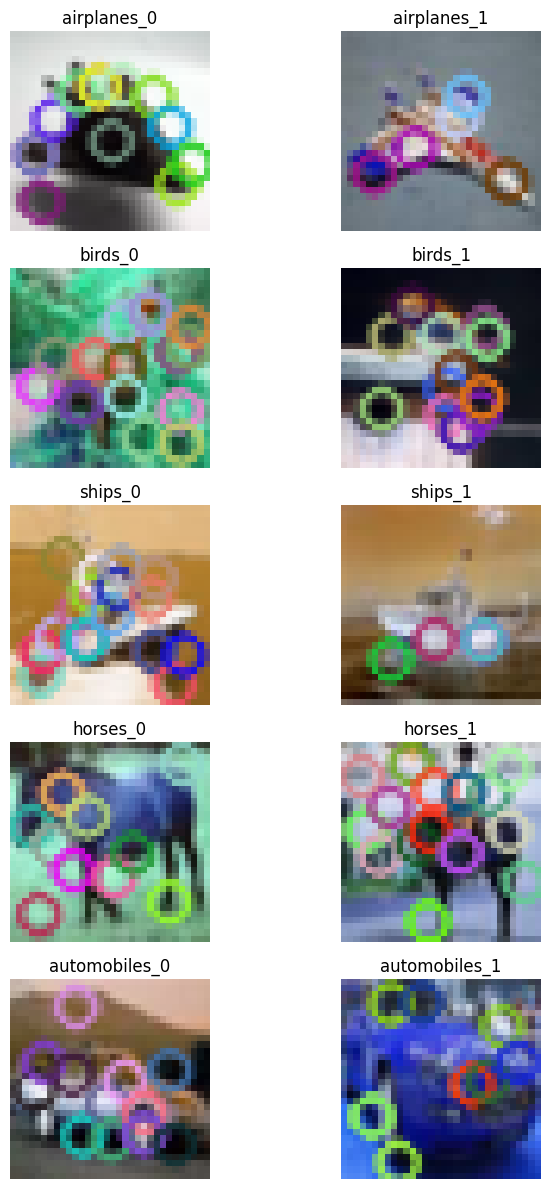

In [3]:
def plot_sift_descriptors(data, label, visualize=True):    
    if visualize:
        fig, axes = plt.subplots(5, 2, figsize=(8, 12))
    
    for j, class_name in enumerate(class_names):
        for i, sample in enumerate(data[label == j]):
            if i > 1:
                break
            
            gray = cv2.cvtColor(sample, cv2.COLOR_BGR2GRAY)

            keypoints, _ = sift.detectAndCompute(gray, None)
            image_with_keypoints = cv2.drawKeypoints(sample, keypoints, outImage=sample)

            if visualize:
                ax = axes[j, i]
                ax.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))
                ax.axis('off')
                ax.set_title(f'{class_name}_{i}')
    if visualize:
        plt.tight_layout()
        plt.show()

plot_sift_descriptors(training_data, training_label)

## **2.2 Building Visual Vocabulary**

Here, we will obtain visual words by clustering feature descriptors, so each cluster center is a visual word. Take a subset of all training images (this subset should contain images from ALL categories), extract SIFT descriptors from all of these images, and run k-means clustering (you can use your favourite k-means implementation) on these SIFT descriptors to build your visual vocabulary. Then, take the rest of the training images to calculate a visual dictionary.

You can also use less images, say 100 from each class (exclusive from the previous subset) if your computational resources are limited (remember to analyze the effects). Pre-defined cluster numbers will be the size of your vocabulary. In this question, set its size to 1000.

####  **` Q2.2: Building Visual Vocabulary. (10-pts)`**
Create a visual vocabulary by using K-means clustering. Remember to display the results when the vocabulary subset is 30\%, 40\% and 50\% amount of the training images. The vocabulary size is fixed 1000 in this question.

**Hint 1:** Remember first to debug all the code with a small amount of input images and only when you are sure that code functions correctly run it for training over the larger dataset.

**Hint 2:** You can achieve K-means clustering using either *sklearn* package or *scipy* package.

**Hint 3:** Results of K-means clustering could be shown using a scatter plot. In this case, the high-dimensional SIFT descriptors need to be brought down to a lower (2D) dimension  (*PCA* from *sklearn.decomposition* is one method to do this). For easy visualization, plotting up to 10 clusters would suffice. Check out an example implementation [here](https://www.askpython.com/python/examples/plot-k-means-clusters-python). Note that you are free to follow this approach, or you can show the K-means results in any other appropriate method that drives home your point.

In [4]:
VOCABULARY_SIZE = 1500

vocabulary_subset_ratios = [0.5, 0.4, 0.3] # [0.3, 0.4, 0.5] # TODO: run for all

In [5]:
# descriptors - is the 16x16 area around the keypoint

feature_descriptors = defaultdict(list)

for subset_ratio in vocabulary_subset_ratios:
    X_train_subset, X_train_leftover, y_train_subset, y_train_leftover = train_test_split(training_data, training_label, train_size=subset_ratio, random_state=42, shuffle=True, stratify=training_label)
    
    for sample in X_train_subset:
        sample_gray = cv2.cvtColor(sample, cv2.COLOR_BGR2GRAY)
        _, descriptors = sift.detectAndCompute(sample_gray, None)
    
        if descriptors is not None:
            for descriptor in descriptors:
                feature_descriptors[f'SUBSET_{subset_ratio}'].append(descriptor)

    print(f"Found {len(feature_descriptors[f'SUBSET_{subset_ratio}'])} descriptors for subset ratio {subset_ratio}")
    

Found 30448 descriptors for subset ratio 0.5
Found 24448 descriptors for subset ratio 0.4
Found 18416 descriptors for subset ratio 0.3


### Building visual dictionary

In [6]:
def build_visual_dictionary(data: np.ndarray, vocabulary_size=1000, random_state=42):
    """Creates a visual dictionary from the given data with K (vocabulary_size) visual words using KMeans algorithm.

    Args:
        data (np.ndarray): Data to build visual dictionary from.
        k (int, optional): Num clusters. Defaults to 50.
        random_state (int, optional): Random state. Defaults to 42.

    Returns:
        visual_dictionary: The visual dictionary. 
    """
    visual_dictionary = KMeans(n_clusters=vocabulary_size, random_state=random_state).fit(data)
    return visual_dictionary

In [7]:

visual_dicts = {}
cluster_labels_dicts = {}

for subset_ratio in vocabulary_subset_ratios:
    visual_dict = build_visual_dictionary(feature_descriptors[f'SUBSET_{subset_ratio}'], vocabulary_size=VOCABULARY_SIZE, random_state=seed)
    cluster_labels = visual_dict.predict(feature_descriptors[f'SUBSET_{subset_ratio}'])
    
    visual_dicts[f'SUBSET_{subset_ratio}'] = visual_dict
    cluster_labels_dicts[f'SUBSET_{subset_ratio}'] = cluster_labels


/home/fien/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/fien/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/fien/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


### Visualizing the clusters

In [8]:
def display_clusters(data, labels, num_clusters, cluster_centers=None, title=None):
    selected_clusters = np.random.choice(VOCABULARY_SIZE, num_clusters, replace=False)
    
    # TODO: Create a mask and use it to filter the data and labels
    mask = np.isin(labels, selected_clusters)
    
    filtered_data = data[mask]
    filtered_labels = labels[mask]
    filtered_cluster_centers = cluster_centers[selected_clusters]
    
    plt.scatter(filtered_data[:, 0], filtered_data[:, 1], c=filtered_labels, cmap='viridis', s=50)

    if cluster_centers is not None:
        plt.scatter(filtered_cluster_centers[:, 0], filtered_cluster_centers[:, 1], c='black', marker='x', s=150, alpha=0.5)

    if title is not None:
        plt.title(title)
    plt.show()
    

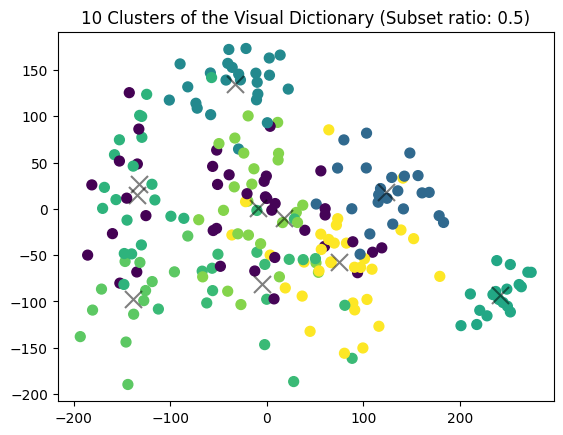

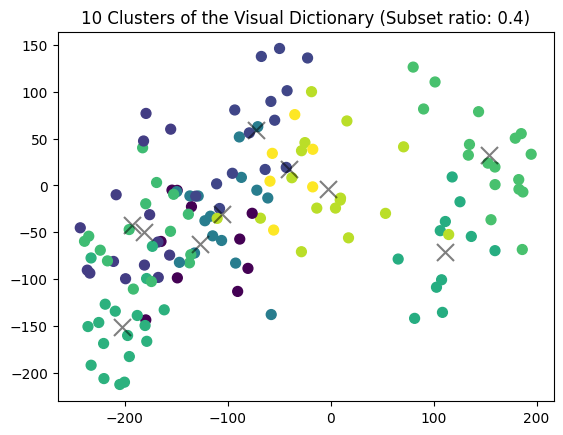

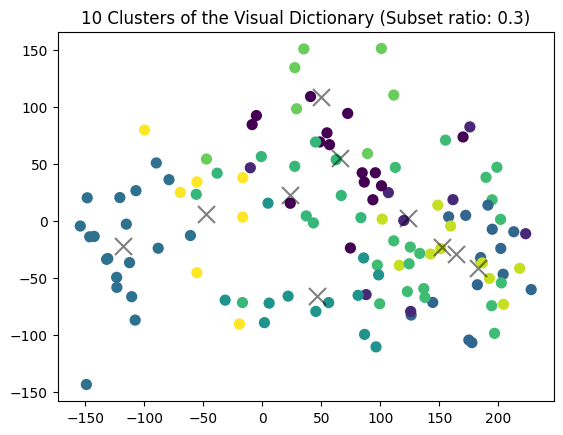

In [9]:
NUM_CLUSTERS_TO_VISUALIZE = 10

pca = PCA(n_components=2, random_state=seed)

for subset_ratio in vocabulary_subset_ratios:
    feature_descriptors_2Ds = []
    feature_descriptors_2D = pca.fit_transform(np.array(feature_descriptors[f'SUBSET_{subset_ratio}']))
    cluster_centers = pca.transform(visual_dicts[f'SUBSET_{subset_ratio}'].cluster_centers_)
    
    feature_descriptors_2Ds.append(feature_descriptors_2D)
    
    display_clusters(feature_descriptors_2D,
                     cluster_labels_dicts[f'SUBSET_{subset_ratio}'],
                     NUM_CLUSTERS_TO_VISUALIZE,
                     cluster_centers,
                     title=f'{NUM_CLUSTERS_TO_VISUALIZE} Clusters of the Visual Dictionary (Subset ratio: {subset_ratio})')


## **2.3 Encoding Features Using Visual Vocabulary**

Once we have a visual vocabulary, we can represent each image as a collection of visual words. For this purpose, we need to extract feature descriptors (with SIFT) and then assign each descriptor to the closest visual word from the vocabulary.

In [10]:
def encode_images(data, labels, visual_dict):
    encoded_images = []
    encoded_labels = []

    for sample, label in zip(data, labels):
        encoded_image = encode_image_features(sample, visual_dict)
        if encoded_image is not None:
            encoded_images.append(encoded_image)
            encoded_labels.append(label)

    print(f"Images encoded {len(encoded_images)} / {len(data)}")
    return encoded_images, encoded_labels


def encode_image_features(img, visual_dict):
    """Encodes the image features using the visual dictionary.

    Args:
        img (np.ndarray): image to encode
        visual_dict (sklearn.base.BaseEstimator): visual dictionary

    Returns:
        visual_words: (np.ndarray) encoded image features (visual words)
        None: if no descriptors were found
    """
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, descriptors = sift.detectAndCompute(img_gray, None)
    
    if descriptors is not None:
        visual_words = visual_dict.predict(list(descriptors))
        return visual_words
    else:
        return None
    

Chosen Visual Dict

In [11]:
visual_dict = visual_dicts[f'SUBSET_{0.4}']

Encoding the remaining X_train set

In [12]:
X_train_subset_encoded, y_train_subset_encoded = encode_images(X_train_subset, y_train_subset, visual_dict)

assert len(X_train_subset_encoded) == len(y_train_subset_encoded)

Images encoded 1494 / 1500


## **2.4 Representing images by frequencies of visual words**

The next step is the quantization. The idea is to represent each image by a histogram of its visual words. Check out matplotlib's [hist()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) function. Since different images can have different numbers of features, histograms should be normalized.

####  **` Q2.4: Representing images by frequencies of visual words. (5-pts)`**

Pick a subset ratio from the above settings (30%, 40% and 50%). For each class, calculate the frequency of visual words. Visualize the visual words' frequency by histogram. The X-axis is supposed to be the visual word number (e.g.,from 0 to 1000), and the Y-axis is supposed to be the frequency. Describe the similarities and differences.

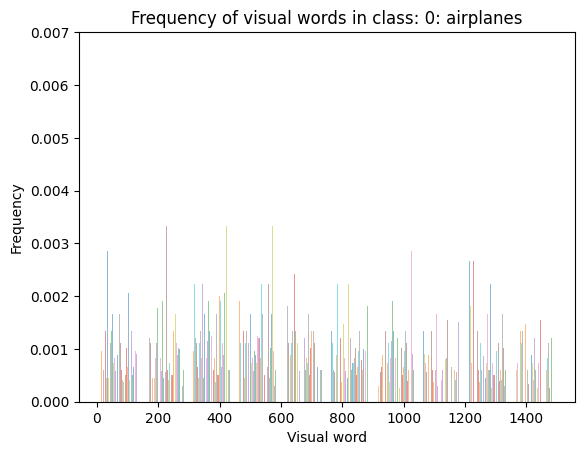

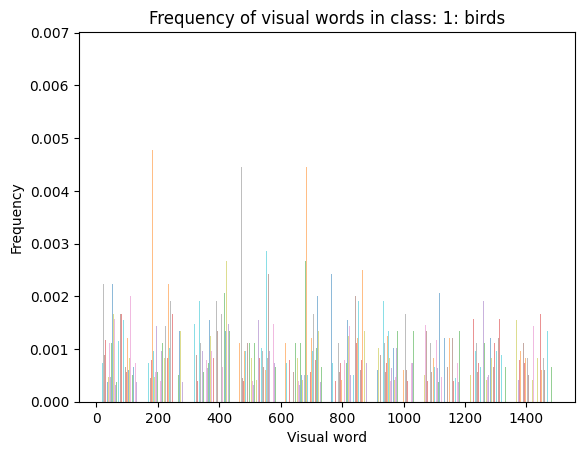

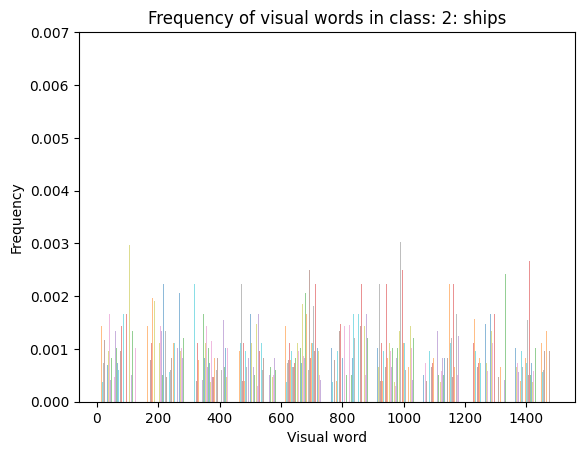

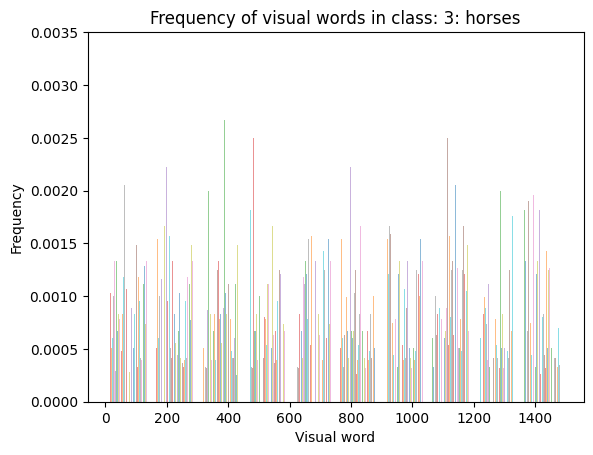

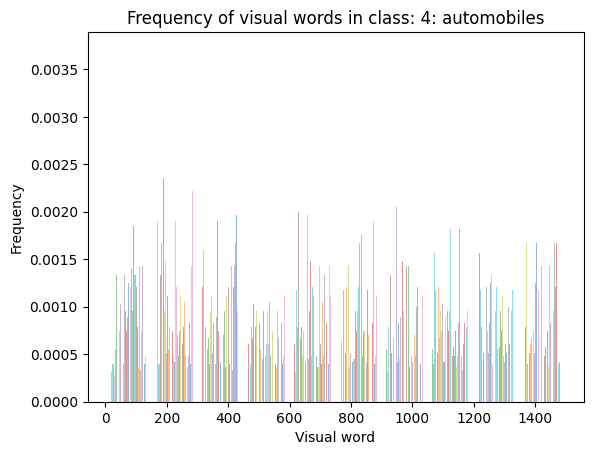

In [13]:
for class_label in classes:
    filtered_data = list(compress(X_train_subset_encoded, np.array(y_train_subset_encoded) == class_label))
    plt.hist(filtered_data, label=class_label, alpha=0.5, density=True) # bins=VOCABULARY_SIZE
    plt.title(f'Frequency of visual words in class: {class_label}: {class_names[class_label]}')
    plt.ylabel('Frequency')
    plt.xlabel('Visual word')
    plt.show()

## **2.5 Classification**

We will train a classifier per each object class. Now, we take the Support Vector Machine (SVM) as an example. As a result, we will have 5 *binary* classifiers.

Take images from the training set of the related class (should be the ones which you did not use for dictionary calculation). Represent them with histograms of visual words as discussed in the previous section. Use at least 50 training images per class or more, but remember to debug your code first! If you use the default setting, you should have 50 histograms of size 1000. These will be your positive examples.

Then, you will obtain histograms of visual words for images from other classes, again about 50 images per class, as negative examples. Therefore, you will have 200 negative examples.

Now, you are ready to train a classifier. You should repeat it for each class. To classify a new image, you should calculate its visual words histogram as described in Section 2.4 and use the trained SVM classifier to assign it to the most probable object class. (Note that for proper SVM scores you need to use cross-validation to get a proper estimate of the SVM parameters. In this assignment, you do not have to experiment with this cross-validation step).

In [14]:
def preprocess_data(data, labels, visual_dict):
    """Preprocesses the data by encoding the images using the visual dictionary and creating histograms.

    Args:
        data (np.ndarray): input data to be preprocessed
        labels (np.ndarray): input labels
        visual_dict (np.ndarray): visual dictionary

    Returns:
        data_histograms: the preprocessed data
        labels_encoded: corresponding labels
    """
    data_encoded, labels_encoded = encode_images(data, labels, visual_dict)

    labels_encoded = np.array(labels_encoded)

    assert len(data_encoded) == len(labels_encoded)

    data_histograms = []

    for sample in data_encoded:
        counts, _ = np.histogram(sample, bins=VOCABULARY_SIZE)
        data_histograms.append(counts)
    
    data_histograms = np.array(data_histograms)
    return data_histograms, labels_encoded

In [15]:
X_train_histograms, y_train_leftover_encoded = preprocess_data(X_train_leftover, y_train_leftover, visual_dict)

Images encoded 3489 / 3500


In [16]:
print(y_train_leftover_encoded)
print(len(y_train_leftover_encoded))

[4 0 4 ... 1 3 1]
3489


In [17]:
y_train_class = {
    0: np.array(y_train_leftover_encoded == 0).astype(int),
    1: np.array(y_train_leftover_encoded == 1).astype(int),
    2: np.array(y_train_leftover_encoded == 2).astype(int),
    3: np.array(y_train_leftover_encoded == 3).astype(int),
    4: np.array(y_train_leftover_encoded == 4).astype(int)
}

In [18]:
print(y_train_class[0])
print(len(y_train_class[0]))
print(y_train_class[1])

[0 1 0 ... 0 0 0]
3489
[0 0 0 ... 1 0 1]


####  **` Q2.5: Classification (5-pts)`**

Utilize SVM and finish classification training.

**Hint:**
You can use *scikit-learn* software to conduct SVM classification. The relevant documents can be found at this [link](https://scikit-learn.org/stable/modules/svm.html).

In [19]:
svm_0 = SVC(random_state=seed, class_weight='balanced')
svm_1 = SVC(random_state=seed, class_weight='balanced')
svm_2 = SVC(random_state=seed, class_weight='balanced')
svm_3 = SVC(random_state=seed, class_weight='balanced')
svm_4 = SVC(random_state=seed, class_weight='balanced')

In [20]:

svm_0.fit(X_train_histograms, y_train_class[0])
svm_1.fit(X_train_histograms, y_train_class[1])
svm_2.fit(X_train_histograms, y_train_class[2])
svm_3.fit(X_train_histograms, y_train_class[3])
svm_4.fit(X_train_histograms, y_train_class[4])

models = [svm_0, svm_1, svm_2, svm_3, svm_4]

## **2.6 Evaluation**

To evaluate your system, you should take all the test images from all classes and rank them based on each binary classifier. In other words, you should classify each test image with each classifier and then sort them based on the classification score. As a result, you will have five lists of test images. Ideally, you would have images with airplanes on the top of your list which is created based on your airplane classifier, and images with cars on the top of your list which is created based on your car classifier, and so on.

In addition to the qualitative analysis, you should measure the performance of the system quantitatively with the Mean Average Precision (mAP) over all classes. The mAP for a single class c is defined as

$$
\begin{equation}
\frac{1}{m_c} \sum_{i=1}^{n} \frac{f_c(x_i)}{i}
\end{equation}
$$

where $n$ is the number of images ($n=50\times 5=250$), $m$ is the number of images of class $c$  ($m_c=50$), $x_i$ is the $i^{th}$ image in the ranked list $X = \left \{ x_1, x_2, \dots, x_n  \right \}$, and finally, $f_c$ is a function which returns the number of images of class $c$ in the first $i$ images if $x_i$ is of class $c$, and 0 otherwise. To illustrate, if we want to retrieve $R$ and we get the following sequence: $[R, R, T, R, T, T, R, T]$, then $n = 8$, $m = 4$, and $AP(R, R, T, R, T, T, R) = \frac{1}{4} \left (  \frac{1}{1} + \frac{2}{2} + \frac{0}{3} + \frac{3}{4} + \frac{0}{5} + \frac{0}{6} + \frac{4}{7} + \frac{0}{8} \right )$.

####  **` Q2.6: Evaluation and Discussion (30-pts)`**

Show the evaluation results and describe. The report should include the analysis of the results for different settings such as:
- mAP based on different subset ratios to create the vocabulary list (30%, 40% and 50%) under the fixed vocabulary size 1000.
- Based on the ratio among the above four settings that lead to the best performance, change the vocabulary sizes to different sizes (500, 1000 and 1500). Report and discuss the mAP.
- Based on the above experiments, find the best setting. Report the mAP based on SIFT descriptor and HoG descriptor.
- Visualize the top-5 and the bottom-5 ranked test images (based on the classifier confidence for the target class) under the best setting.
- The impact of the hyper-parameters of SVM.  

**Hint 1:**
To alleviate the working load, the discussion on the impact of SVM’s hyper-parameter settings only need to based on the optimal settings from the first three questions.

**Hint 2:**
Be sure to discuss the differences between different settings such as vocabulary sizes in your report.

**Hint 3:**
You can use *skimage.feature.hog* to extract HoG descriptor. The relevant documents can be found at [link](https://scikit-image.org/docs/dev/api/skimage.feature.html?highlight=hog#skimage.feature.hog).

Preprocessing test data

In [21]:
X_test, y_test = preprocess_data(test_data, test_label, visual_dict)
assert len(X_test) == len(y_test)

Images encoded 4982 / 5000


In [22]:
y_test_class = {
    0: np.array(y_test == 0).astype(int),
    1: np.array(y_test == 1).astype(int),
    2: np.array(y_test == 2).astype(int),
    3: np.array(y_test == 3).astype(int),
    4: np.array(y_test == 4).astype(int)
}

Predicting

In [23]:
y_pred_class = {
    0: models[0].predict(X_test),
    1: models[1].predict(X_test),
    2: models[2].predict(X_test),
    3: models[3].predict(X_test),
    4: models[4].predict(X_test),
}

In [24]:
all_classes_decision_function_scores = []
all_class_predictions = []
for i, class_index in enumerate(class_names):
    decision_function_scores = models[i].decision_function(X_test)
    # print(len(decision_function_scores))
    class_predictions = y_pred_class[i]
    # print(len(class_predictions))
    print(class_predictions)
    
    all_classes_decision_function_scores.append(decision_function_scores)
    all_class_predictions.append(class_predictions)



[0 1 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 1 1 ... 0 0 0]
[1 0 0 ... 1 1 1]
[0 0 0 ... 0 1 0]


In [25]:
classified = []
X = []
for image_idx in range(len(all_classes_decision_function_scores[0])):
    scores = []
    for scores_list in all_classes_decision_function_scores:
        scores.append(scores_list[image_idx])
    # print(scores)
    X.append(max(scores))
    classified.append(scores.index(max(scores)))

print(len(X))
# print(X)
print(len(classified))
# print(classified)

4982
4982


In [26]:
X, classified = zip(*sorted(zip(X, classified), reverse=True))

In [27]:
mAPs = []
for i, class_index in enumerate(class_names):
    # print(i)
    sum_f = 0
    for index, image in enumerate(classified):
        index = index+1
        if image != i:
            fc_x = 0
        else:
            # print("h: ", len(classified[:index]))
            # print(classified[:index])
            # print(classified[:index].count(i))
            fc_x = classified[:index].count(i)
        sum_f = sum_f + fc_x/index
        
    mAP_class_i = 1/classified[:index].count(i) * sum_f
    mAPs.append(mAP_class_i)

print(mAPs)
print(np.mean(mAPs))

[0.30347882081044003, 0.2459203512452447, 0.27951154383313825, 0.17957141554781325, 0.12180675717394217]
0.2260577777221157


In [28]:
from sklearn.metrics import average_precision_score
Precisions = []
Recalls = []

for i, class_index in enumerate(class_names):
    True_Pos = len(np.where((y_pred_class[i] == 1) & (y_test_class[i] == 1))[0])
    True_Neg = len(np.where((y_pred_class[i] == 0) & (y_test_class[i] == 0))[0])
    False_Pos = len(np.where((y_pred_class[i] == 1) & (y_test_class[i] == 0))[0])
    False_Neg = len(np.where((y_pred_class[i] == 0) & (y_test_class[i] == 1))[0])
    Accuracy = (True_Pos + True_Neg)/(True_Pos + True_Neg + False_Pos + False_Neg)*100
    Precision = True_Pos/(True_Pos + False_Pos)*100
    Precisions.append(Precision)
    Recall = True_Pos/(True_Pos + False_Neg)*100
    Recalls.append(Recall)
    F1_score = 2 * (Precision * Recall)/(Precision + Recall)


    print('\n')
    print(f"Class {class_index}:")
    print("next class")
    # print(True_Pos)
    # print(True_Neg)
    # print(False_Pos)
    # print(False_Neg)
    print("Accuracy: ", Accuracy)
    print("Precision: ", Precision)
    print("Recall: ", Recall)
    print("F1_score: ", F1_score)


print('\n')



Class airplanes:
next class
Accuracy:  68.6069851465275
Precision:  28.698224852071007
Recall:  39.27125506072874
F1_score:  33.16239316239316


Class birds:
next class
Accuracy:  66.45925331192292
Precision:  25.037037037037035
Recall:  33.90170511534604
F1_score:  28.8027268853856


Class ships:
next class
Accuracy:  68.04496186270575
Precision:  29.38322938322938
Recall:  42.52758274824473
F1_score:  34.75409836065573


Class horses:
next class
Accuracy:  73.76555600160579
Precision:  32.29527104959631
Recall:  28.000000000000004
F1_score:  29.994643813604718


Class automobiles:
next class
Accuracy:  74.08671216378964
Precision:  26.794258373205743
Recall:  16.8
F1_score:  20.651505838967424




Top 5 predictions for class airplanes:


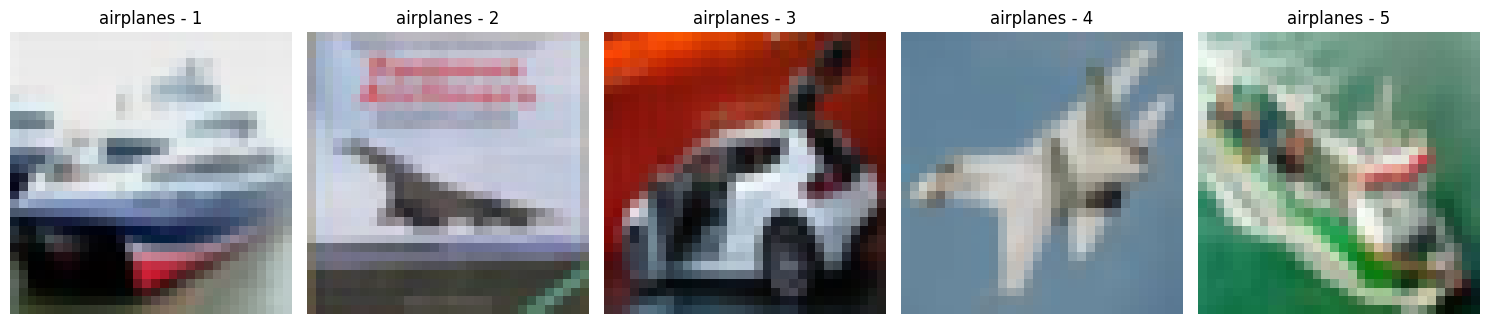

Bottom 5 predictions for class airplanes:


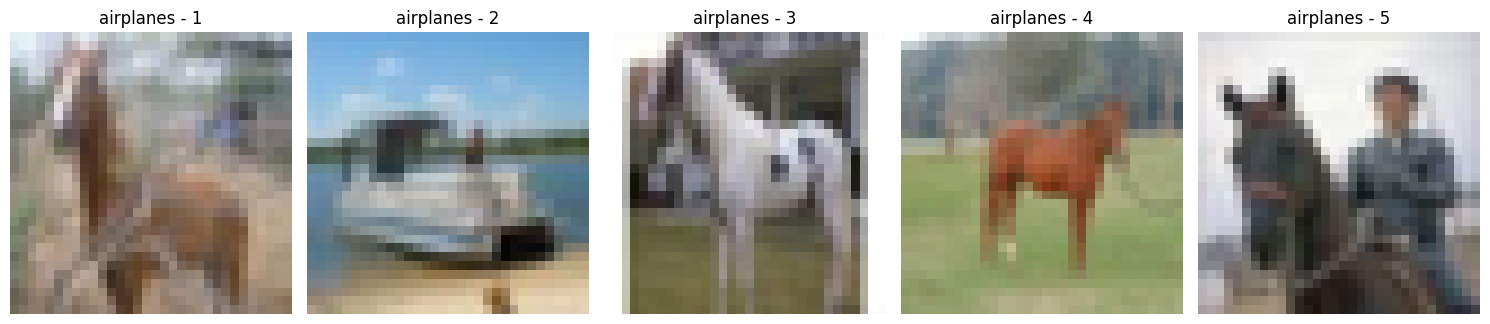



Top 5 predictions for class birds:


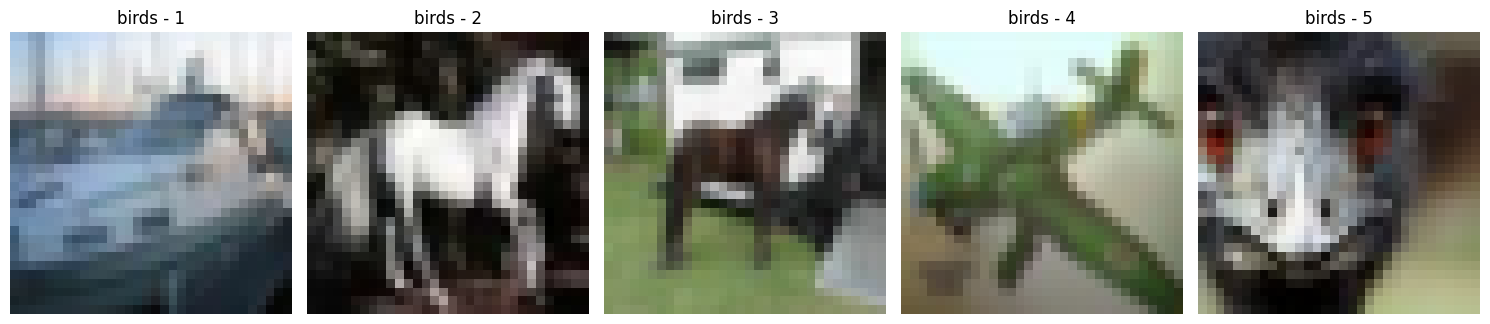

Bottom 5 predictions for class birds:


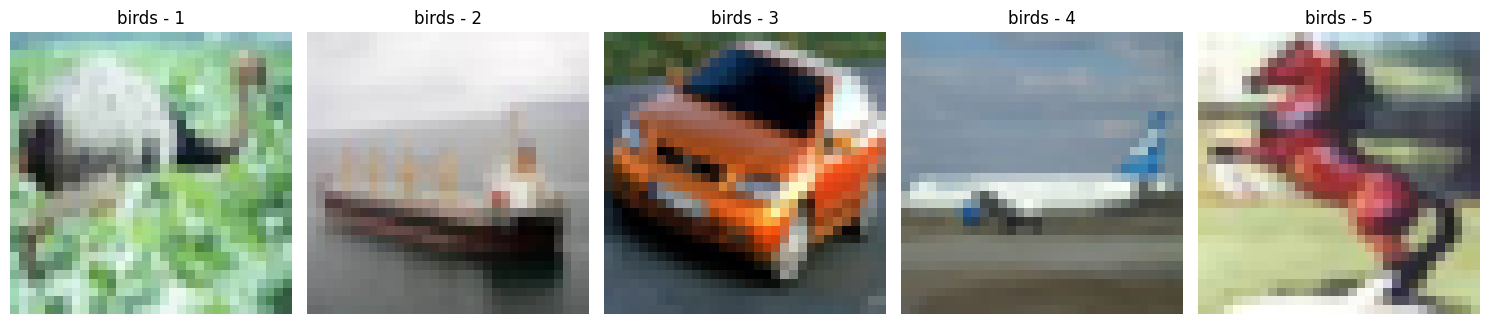



Top 5 predictions for class ships:


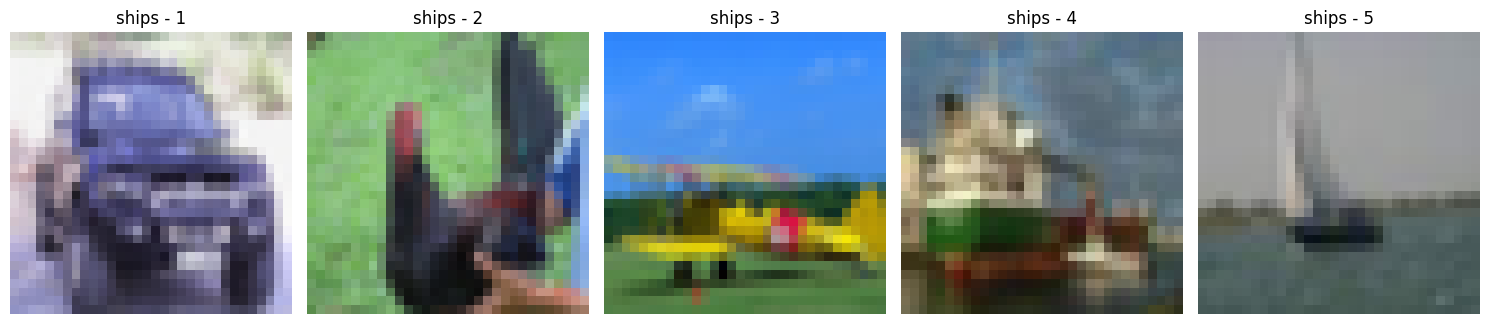

Bottom 5 predictions for class ships:


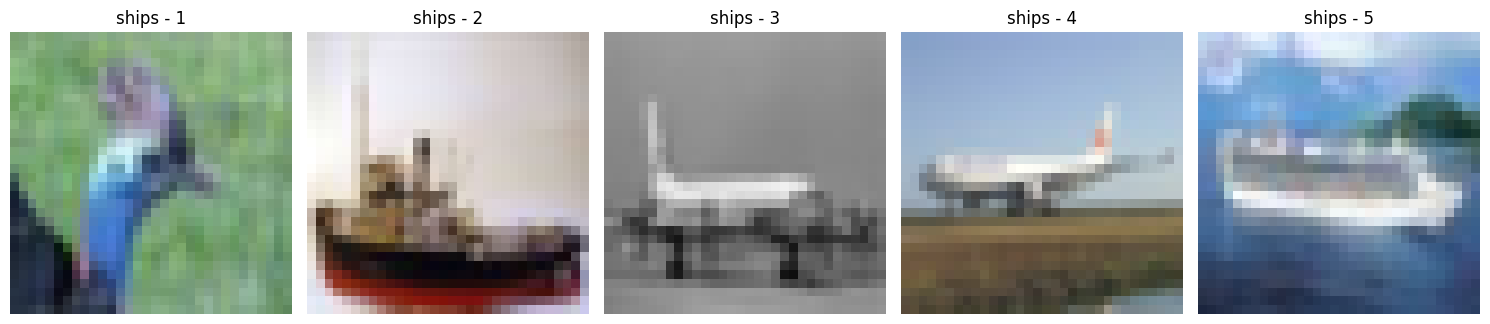



Top 5 predictions for class horses:


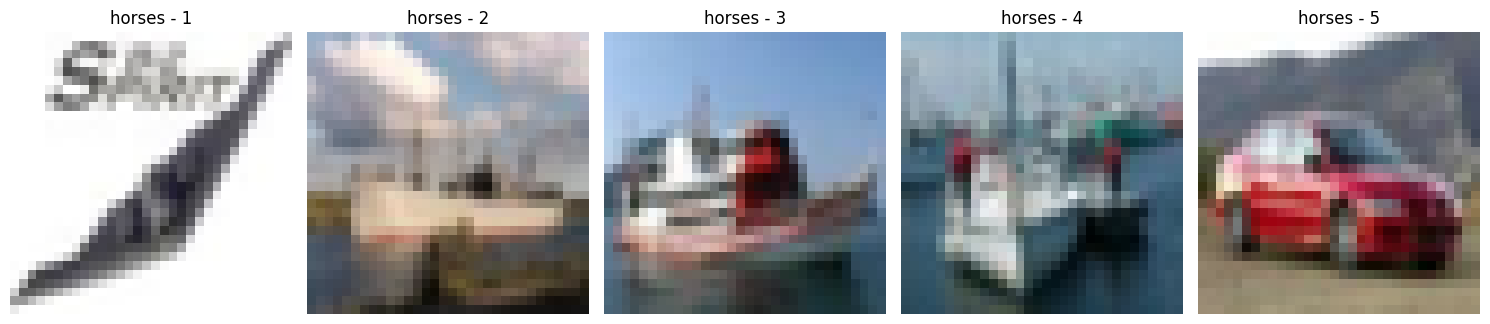

Bottom 5 predictions for class horses:


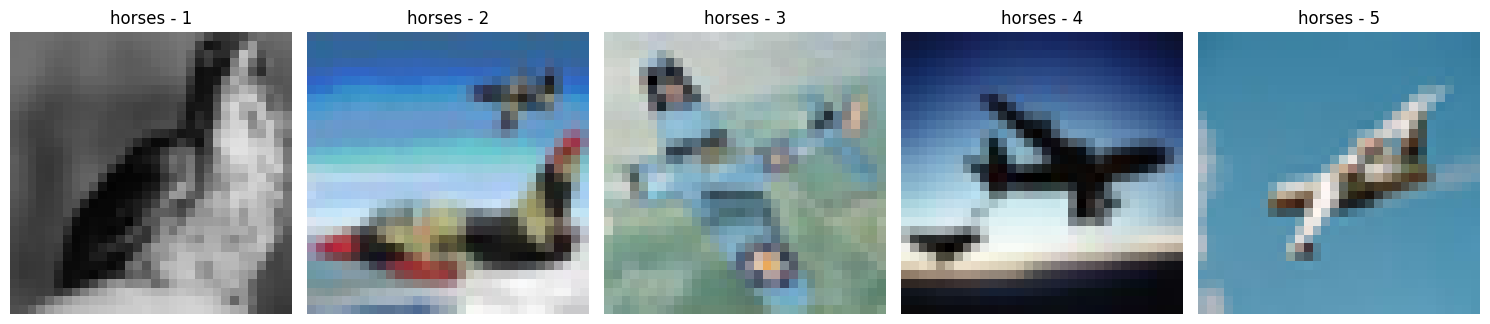



Top 5 predictions for class automobiles:


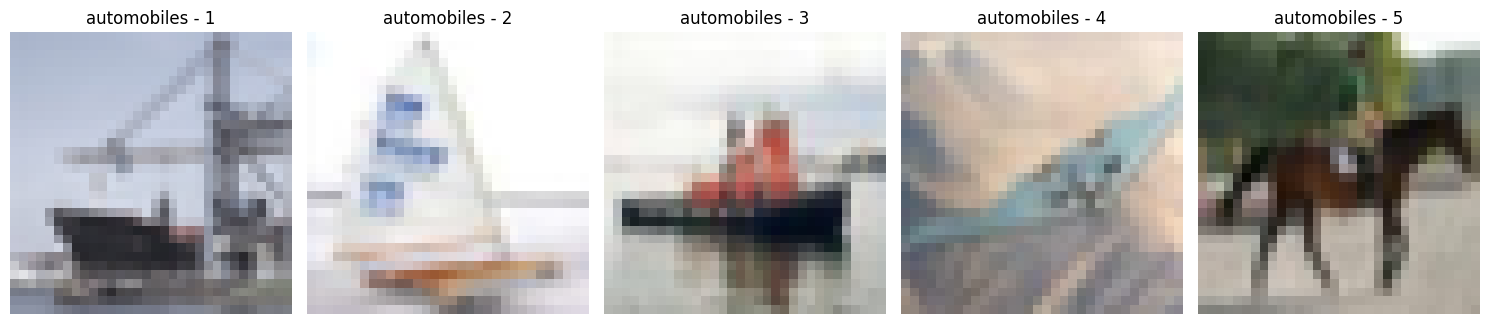

Bottom 5 predictions for class automobiles:


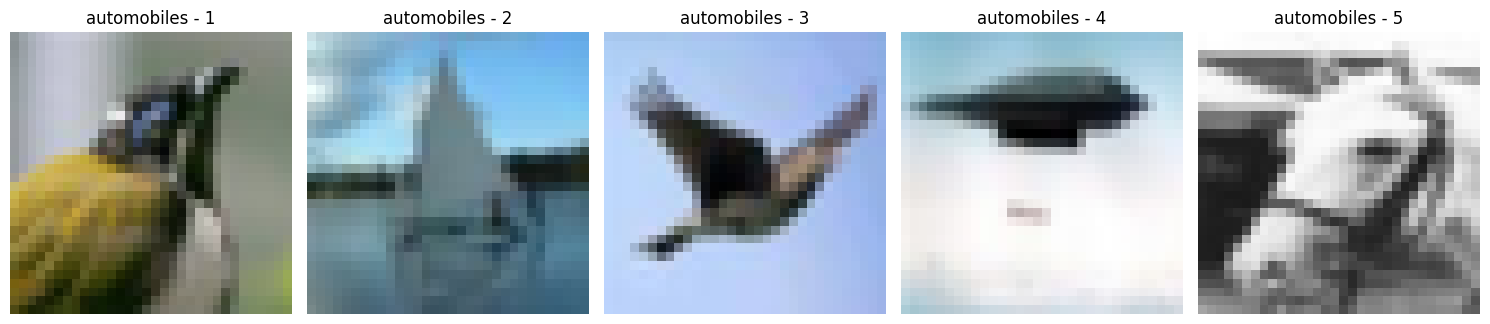

In [29]:
k = 5
for i, class_index in enumerate(class_names):
    print(f"Top 5 predictions for class {class_index}:")
    top5_indices = []
    for idx, image in enumerate(classified):
        if image == i:
            top5_indices.append(idx)
        if len(top5_indices) == 5:
            break

    fig, axes = plt.subplots(1, k, figsize=(15, 4))    
    for j, idx in enumerate(top5_indices):
        ax = axes[j]
        image_data = test_data[idx]
        ax.imshow(image_data)
        ax.axis('off')
        ax.set_title(f'{class_index} - {j+1}')

    plt.tight_layout()
    plt.show()

    print(f"Bottom 5 predictions for class {class_index}:")

    bottom5_indices = []
    for idx, image in enumerate(classified[::-1]):
        if image == i:
            bottom5_indices.append(len(classified)-idx-1)
        if len(bottom5_indices) == 5:
            break

    fig, axes = plt.subplots(1, k, figsize=(15, 4))    
    for j, idx in enumerate(bottom5_indices):
        # print(j)
        # print(idx)
        ax = axes[j]
        image_data = test_data[idx]
        ax.imshow(image_data)
        ax.axis('off')
        ax.set_title(f'{class_index} - {j+1}')

    plt.tight_layout()
    plt.show()
    print('\n')

# **Same steps but now for HoG**

In [30]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from collections import defaultdict
from itertools import compress

from lab1_utils import CIFAR10

seed = np.random.seed(42)

trainset = CIFAR10("./data", train=True, N=1000)
testset = CIFAR10("./data", train=False)

training_data = trainset.data
training_label = trainset.targets

test_data = testset.data
test_label = testset.targets

classes = np.unique(training_label)
class_names = ['airplanes', 'birds', 'ships', 'horses', 'automobiles']

Files already downloaded and verified
Files already downloaded and verified


In [31]:
VOCABULARY_SIZE = 1500

vocabulary_subset_ratios = [0.5, 0.4, 0.3] # [0.3, 0.4, 0.5] # TODO: run for all

In [32]:
from skimage.feature import hog
feature_descriptors = defaultdict(list)

for subset_ratio in vocabulary_subset_ratios:
    X_train_subset, X_train_leftover, y_train_subset, y_train_leftover = train_test_split(training_data, training_label, train_size=subset_ratio, random_state=42, shuffle=True, stratify=training_label)
    
    for sample in X_train_subset:
        sample_gray = cv2.cvtColor(sample, cv2.COLOR_BGR2GRAY)

        features = hog(sample_gray, pixels_per_cell=(16, 16), cells_per_block=(2, 2))

        if features is not None:
            features = np.array(features).reshape((len(features) // 2), 2)
            for feature in features:
                feature_descriptors[f'SUBSET_{subset_ratio}'].append(feature)

    print(f"Found {len(feature_descriptors[f'SUBSET_{subset_ratio}'])} descriptors for subset ratio {subset_ratio}")
    



Found 45000 descriptors for subset ratio 0.5
Found 36000 descriptors for subset ratio 0.4
Found 27000 descriptors for subset ratio 0.3


In [33]:
# changed for HoG + applied scaling

from sklearn.preprocessing import StandardScaler 

def build_visual_dictionary(data: np.ndarray, vocabulary_size=1000, random_state=42):
    """Creates a visual dictionary from the given data with K (vocabulary_size) visual words using KMeans algorithm.

    Args:
        data (np.ndarray): Data to build visual dictionary from.
        k (int, optional): Num clusters. Defaults to 50.
        random_state (int, optional): Random state. Defaults to 42.

    Returns:
        visual_dictionary: The visual dictionary. 
    """

    visual_dictionary = KMeans(n_clusters=vocabulary_size, random_state=random_state).fit(data)
    return visual_dictionary

In [34]:

visual_dicts = {}
cluster_labels_dicts = {}

for subset_ratio in vocabulary_subset_ratios:
    visual_dict = build_visual_dictionary(feature_descriptors[f'SUBSET_{subset_ratio}'], vocabulary_size=VOCABULARY_SIZE, random_state=seed)
    cluster_labels = visual_dict.predict(feature_descriptors[f'SUBSET_{subset_ratio}'])
    
    visual_dicts[f'SUBSET_{subset_ratio}'] = visual_dict
    cluster_labels_dicts[f'SUBSET_{subset_ratio}'] = cluster_labels

/home/fien/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/fien/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/fien/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [35]:
def display_clusters(data, labels, num_clusters, cluster_centers=None, title=None):
    selected_clusters = np.random.choice(VOCABULARY_SIZE, num_clusters, replace=False)
    
    # TODO: Create a mask and use it to filter the data and labels
    mask = np.isin(labels, selected_clusters)
    
    filtered_data = data[mask]
    filtered_labels = labels[mask]
    filtered_cluster_centers = cluster_centers[selected_clusters]
    
    plt.scatter(filtered_data[:, 0], filtered_data[:, 1], c=filtered_labels, cmap='viridis', s=50)

    if cluster_centers is not None:
        plt.scatter(filtered_cluster_centers[:, 0], filtered_cluster_centers[:, 1], c='black', marker='x', s=150, alpha=0.5)

    if title is not None:
        plt.title(title)
    plt.show()
    

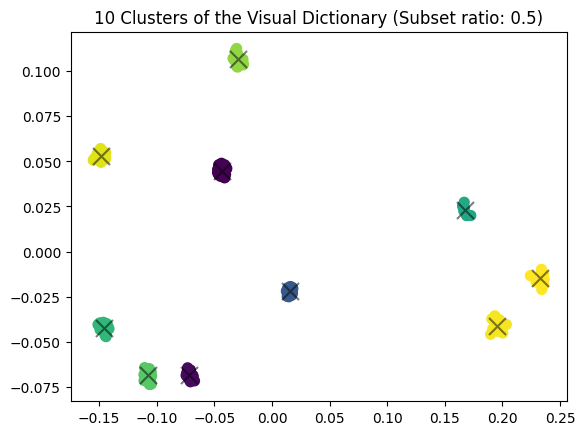

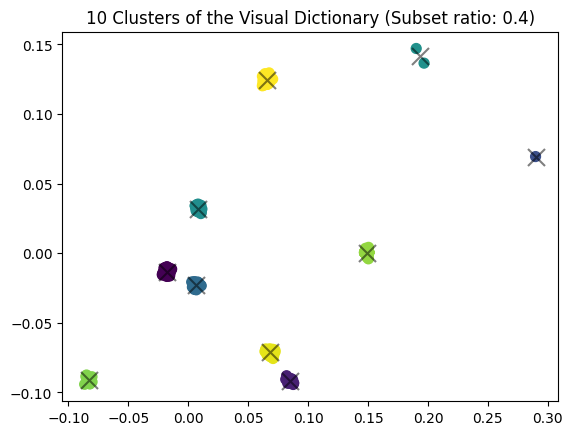

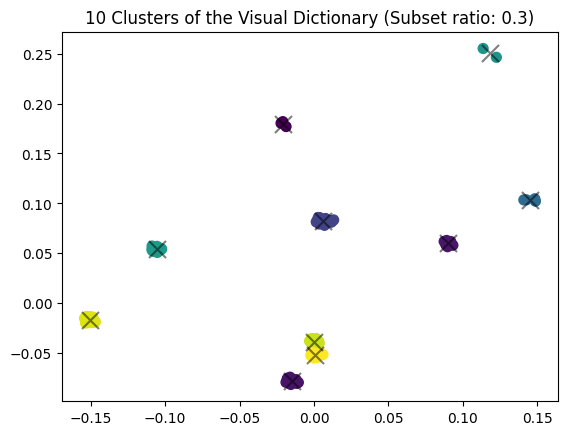

In [36]:
NUM_CLUSTERS_TO_VISUALIZE = 10

pca = PCA(n_components=2, random_state=seed)

for subset_ratio in vocabulary_subset_ratios:
    feature_descriptors_2Ds = []
    feature_descriptors_2D = pca.fit_transform(np.array(feature_descriptors[f'SUBSET_{subset_ratio}']))
    cluster_centers = pca.transform(visual_dicts[f'SUBSET_{subset_ratio}'].cluster_centers_)
    
    feature_descriptors_2Ds.append(feature_descriptors_2D)
    
    display_clusters(feature_descriptors_2D,
                     cluster_labels_dicts[f'SUBSET_{subset_ratio}'],
                     NUM_CLUSTERS_TO_VISUALIZE,
                     cluster_centers,
                     title=f'{NUM_CLUSTERS_TO_VISUALIZE} Clusters of the Visual Dictionary (Subset ratio: {subset_ratio})')


In [37]:
# SIFT replaced here as well

def encode_images(data, labels, visual_dict):
    encoded_images = []
    encoded_labels = []

    for sample, label in zip(data, labels):
        encoded_image = encode_image_features(sample, visual_dict)
        if encoded_image is not None:
            encoded_images.append(encoded_image)
            encoded_labels.append(label)

    print(f"Images encoded {len(encoded_images)} / {len(data)}")
    return encoded_images, encoded_labels


def encode_image_features(img, visual_dict):
    """Encodes the image features using the visual dictionary.

    Args:
        img (np.ndarray): image to encode
        visual_dict (sklearn.base.BaseEstimator): visual dictionary

    Returns:
        visual_words: (np.ndarray) encoded image features (visual words)
        None: if no descriptors were found
    """
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    features = hog(img_gray, pixels_per_cell=(16, 16), cells_per_block=(2, 2))
    
    if features is not None:
        features = np.array(features).reshape((len(features) // 2), 2)
        visual_words = visual_dict.predict(list(features))
        return visual_words
    else:
        return None


In [38]:
visual_dict = visual_dicts[f'SUBSET_{0.5}']

In [39]:
X_train_subset_encoded, y_train_subset_encoded = encode_images(X_train_subset, y_train_subset, visual_dict)

assert len(X_train_subset_encoded) == len(y_train_subset_encoded)

Images encoded 1500 / 1500


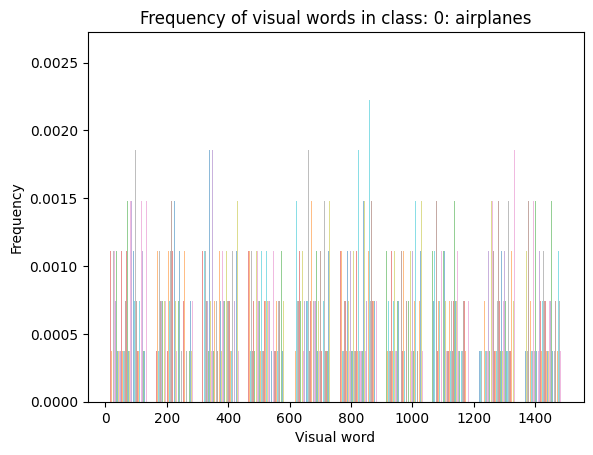

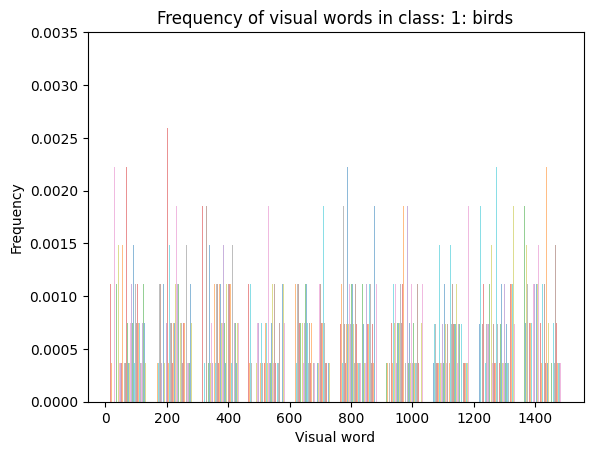

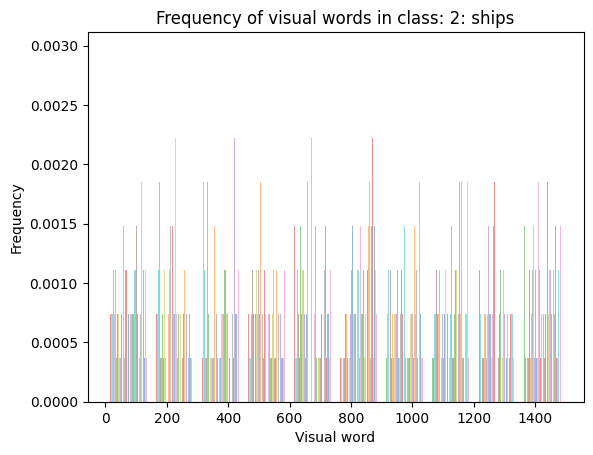

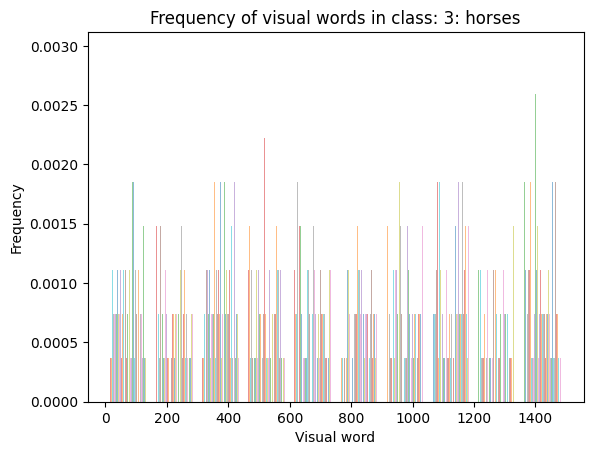

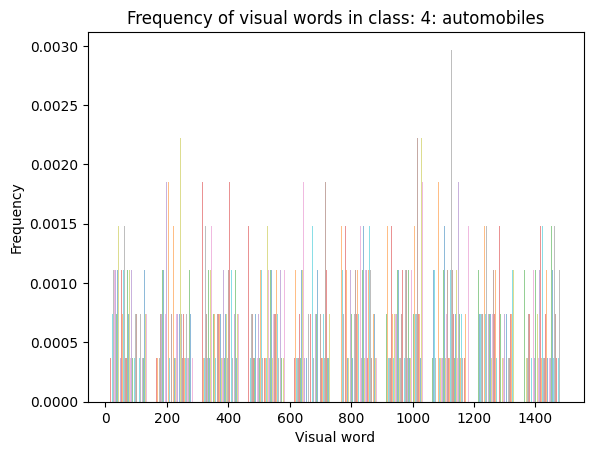

In [40]:
for class_label in classes:
    filtered_data = list(compress(X_train_subset_encoded, np.array(y_train_subset_encoded) == class_label))
    plt.hist(filtered_data, label=class_label, alpha=0.5, density=True, bins=VOCABULARY_SIZE) # 
    plt.title(f'Frequency of visual words in class: {class_label}: {class_names[class_label]}')
    plt.ylabel('Frequency')
    plt.xlabel('Visual word')
    plt.show()

In [41]:
def preprocess_data(data, labels, visual_dict):
    data_encoded, labels_encoded = encode_images(data, labels, visual_dict)

    labels_encoded = np.array(labels_encoded)

    assert len(data_encoded) == len(labels_encoded)

    data_histograms = []

    for sample in data_encoded:
        counts, _ = np.histogram(sample, bins=VOCABULARY_SIZE)
        data_histograms.append(counts)
    
    data_histograms = np.array(data_histograms)
        
    return data_histograms, labels_encoded



In [42]:
X_train_histograms, y_train_leftover_encoded = preprocess_data(X_train_leftover, y_train_leftover, visual_dict)


Images encoded 3500 / 3500


In [43]:
print(y_train_leftover_encoded)
print(len(y_train_leftover_encoded))


[4 0 4 ... 1 3 1]
3500


In [44]:
y_train_class = {
    0: np.array(y_train_leftover_encoded == 0).astype(int),
    1: np.array(y_train_leftover_encoded == 1).astype(int),
    2: np.array(y_train_leftover_encoded == 2).astype(int),
    3: np.array(y_train_leftover_encoded == 3).astype(int),
    4: np.array(y_train_leftover_encoded == 4).astype(int)
}


In [45]:
print(y_train_class[0])
print(len(y_train_class[0]))
print(y_train_class[1])


[0 1 0 ... 0 0 0]
3500
[0 0 0 ... 1 0 1]


In [46]:

svm_0 = SVC(random_state=seed, class_weight='balanced')
svm_1 = SVC(random_state=seed, class_weight='balanced')
svm_2 = SVC(random_state=seed, class_weight='balanced')
svm_3 = SVC(random_state=seed, class_weight='balanced')
svm_4 = SVC(random_state=seed, class_weight='balanced')


In [47]:
svm_0.fit(X_train_histograms, y_train_class[0])
svm_1.fit(X_train_histograms, y_train_class[1])
svm_2.fit(X_train_histograms, y_train_class[2])
svm_3.fit(X_train_histograms, y_train_class[3])
svm_4.fit(X_train_histograms, y_train_class[4])

models = [svm_0, svm_1, svm_2, svm_3, svm_4]

In [48]:
print(len(y_train_class[4]))
print(len(y_train_leftover_encoded))

3500
3500


In [49]:
X_test, y_test = preprocess_data(test_data, test_label, visual_dict)
assert len(X_test) == len(y_test)


Images encoded 5000 / 5000


In [50]:
y_test_class = {
    0: np.array(y_test == 0).astype(int),
    1: np.array(y_test == 1).astype(int),
    2: np.array(y_test == 2).astype(int),
    3: np.array(y_test == 3).astype(int),
    4: np.array(y_test == 4).astype(int)
}

In [51]:
y_pred_class = {
    0: models[0].predict(X_test),
    1: models[1].predict(X_test),
    2: models[2].predict(X_test),
    3: models[3].predict(X_test),
    4: models[4].predict(X_test),
}

In [52]:
all_classes_decision_function_scores = []
all_class_predictions = []
for i, class_index in enumerate(class_names):
    decision_function_scores = models[i].decision_function(X_test)
    # print(len(decision_function_scores))
    class_predictions = y_pred_class[i]
    # print(len(class_predictions))
    print(class_predictions)
    
    all_classes_decision_function_scores.append(decision_function_scores)
    all_class_predictions.append(class_predictions)



[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 1 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


In [53]:
classified = []
X = []
for image_idx in range(len(all_classes_decision_function_scores[0])):
    scores = []
    for scores_list in all_classes_decision_function_scores:
        scores.append(scores_list[image_idx])
    # print(scores)
    X.append(max(scores))
    classified.append(scores.index(max(scores)))

print(len(X))
# print(X)
print(len(classified))
# print(classified)

5000
5000


In [54]:
X, classified = zip(*sorted(zip(X, classified), reverse=True))

In [55]:
mAPs = []
for i, class_index in enumerate(class_names):
    # print(i)
    sum_f = 0
    for index, image in enumerate(classified):
        index = index+1
        if image != i:
            fc_x = 0
        else:
            # print("h: ", len(classified[:index]))
            # print(classified[:index])
            # print(classified[:index].count(i))
            fc_x = classified[:index].count(i)
        sum_f = sum_f + fc_x/index
        
    mAP_class_i = 1/classified[:index].count(i) * sum_f
    mAPs.append(mAP_class_i)
sorted_scores = np.argsort(all_classes_decision_function_scores)[::-1]
print(mAPs)
print(np.mean(mAPs))

[0.21552148654158418, 0.18849472873791195, 0.21272028868045537, 0.19322067816012478, 0.19655800564176787]
0.20130303755236884


In [56]:
from sklearn.metrics import average_precision_score
Precisions = []
Recalls = []


APs = []


for i, class_index in enumerate(class_names):

    True_Pos = len(np.where((y_pred_class[i] == 1) & (y_test_class[i] == 1))[0])
    True_Neg = len(np.where((y_pred_class[i] == 0) & (y_test_class[i] == 0))[0])
    False_Pos = len(np.where((y_pred_class[i] == 1) & (y_test_class[i] == 0))[0])
    False_Neg = len(np.where((y_pred_class[i] == 0) & (y_test_class[i] == 1))[0])
    Accuracy = (True_Pos + True_Neg)/(True_Pos + True_Neg + False_Pos + False_Neg)*100
    Precision = True_Pos/(True_Pos + False_Pos)*100
    Precisions.append(Precision)
    Recall = True_Pos/(True_Pos + False_Neg)*100
    Recalls.append(Recall)
    F1_score = 2 * (Precision * Recall)/(Precision + Recall)


    print('\n')
    print(f"Class {class_index}:")
    print("next class")
    # print(True_Pos)
    # print(True_Neg)
    # print(False_Pos)
    # print(False_Neg)
    print("Accuracy: ", Accuracy)
    print("Precision: ", Precision)
    print("Recall: ", Recall)
    print("F1_score: ", F1_score)
    

print('\n')



Class airplanes:
next class
Accuracy:  73.06
Precision:  16.698656429942417
Recall:  8.7
F1_score:  11.439842209072976


Class birds:
next class
Accuracy:  74.86
Precision:  20.59496567505721
Recall:  9.0
F1_score:  12.526096033402924


Class ships:
next class
Accuracy:  73.6
Precision:  17.8714859437751
Recall:  8.9
F1_score:  11.882510013351135


Class horses:
next class
Accuracy:  75.42
Precision:  24.6119733924612
Recall:  11.1
F1_score:  15.299793246037217


Class automobiles:
next class
Accuracy:  74.64
Precision:  19.81981981981982
Recall:  8.799999999999999
F1_score:  12.188365650969528




Top 5 predictions for class airplanes:


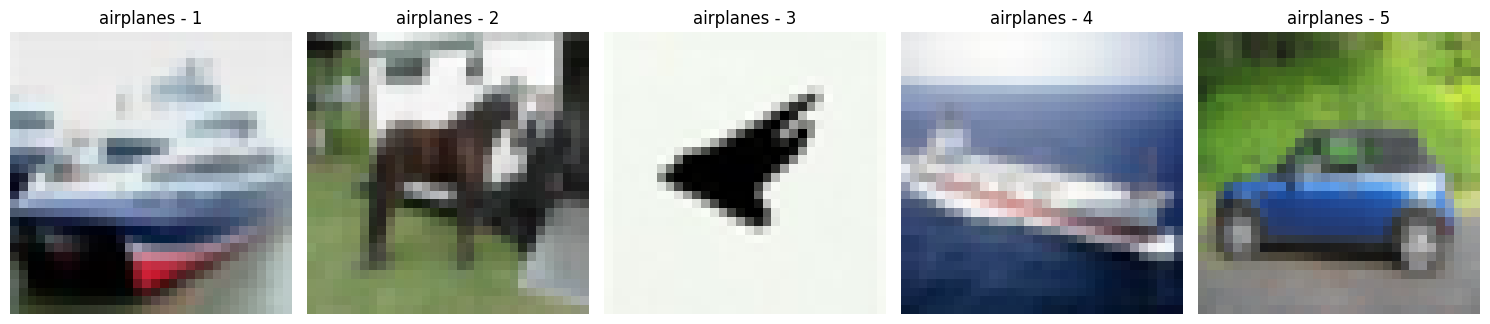

Bottom 5 predictions for class airplanes:


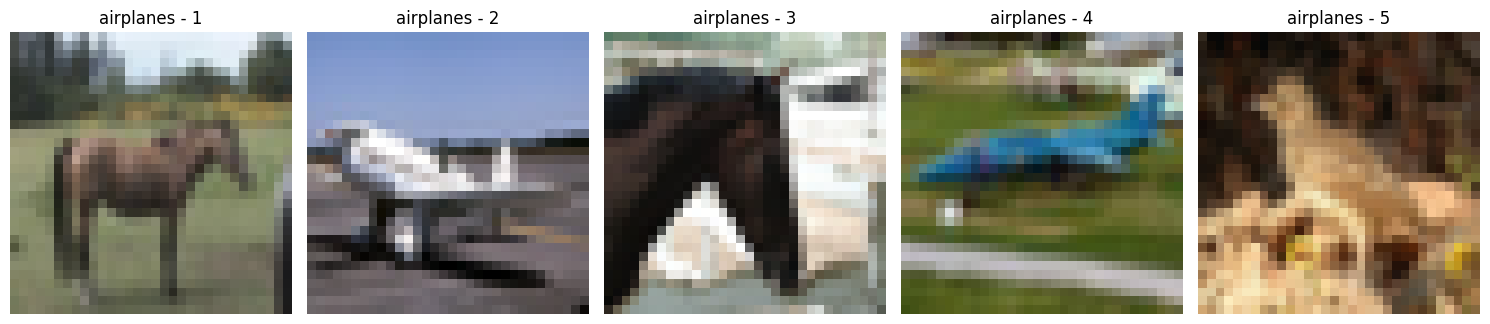



Top 5 predictions for class birds:


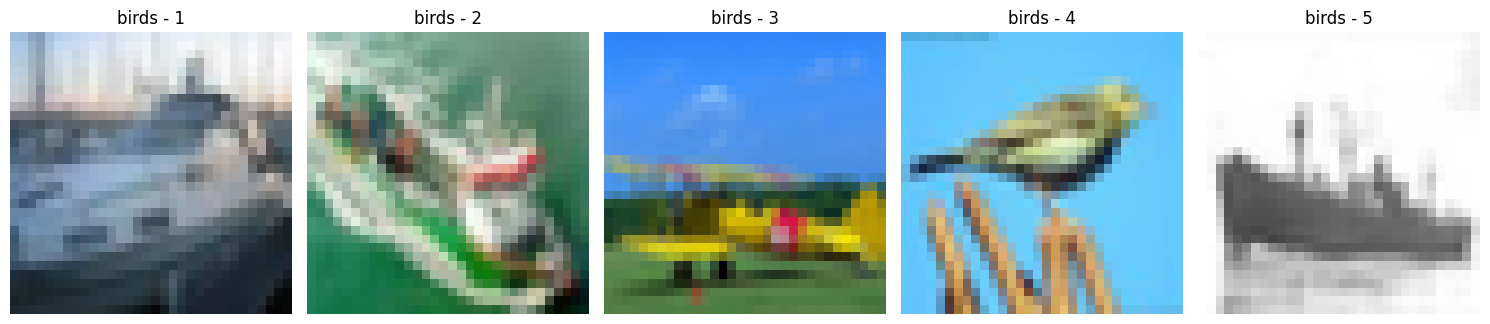

Bottom 5 predictions for class birds:


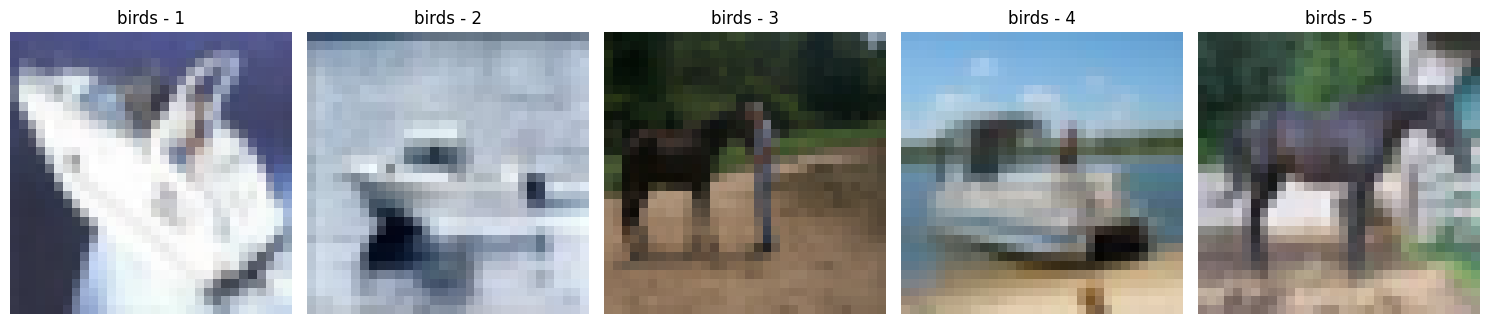



Top 5 predictions for class ships:


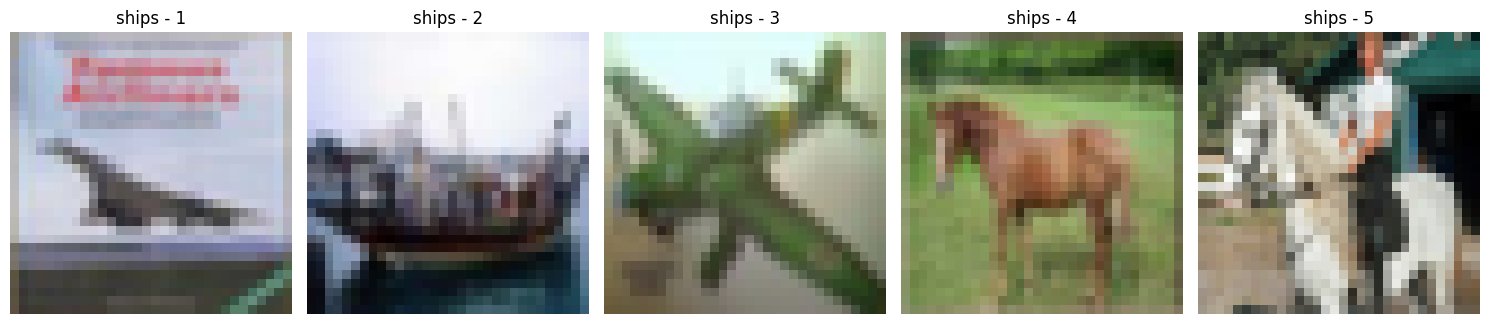

Bottom 5 predictions for class ships:


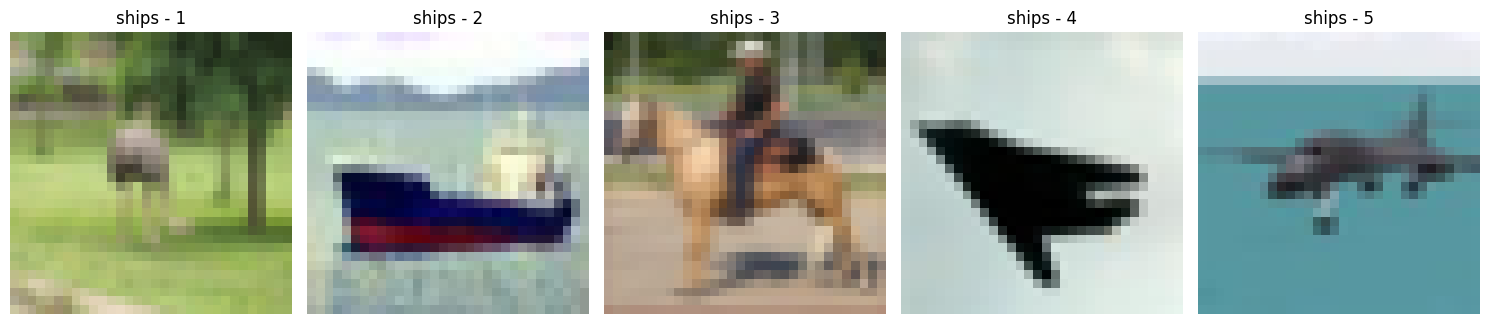



Top 5 predictions for class horses:


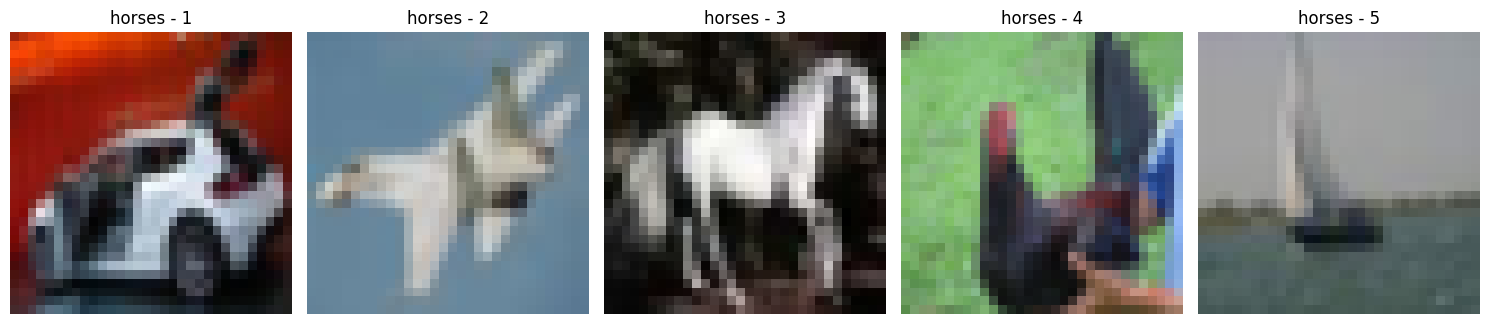

Bottom 5 predictions for class horses:


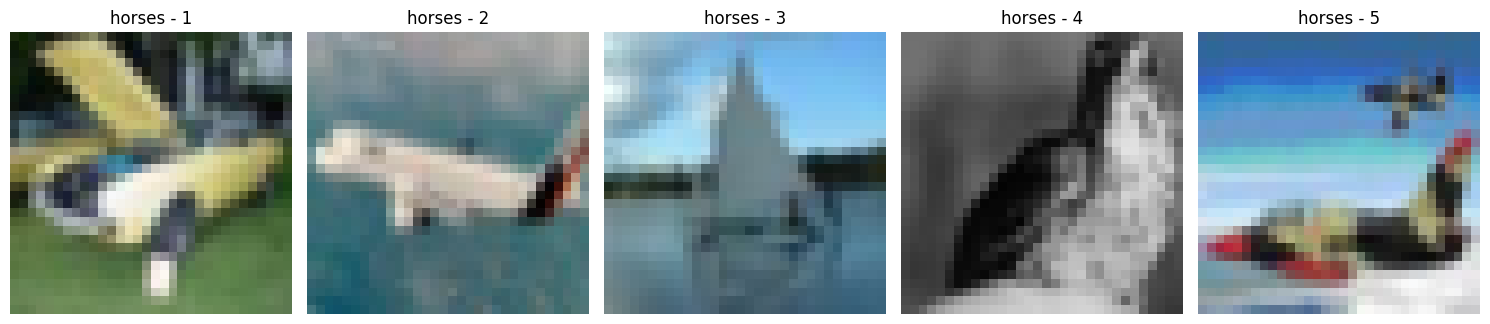



Top 5 predictions for class automobiles:


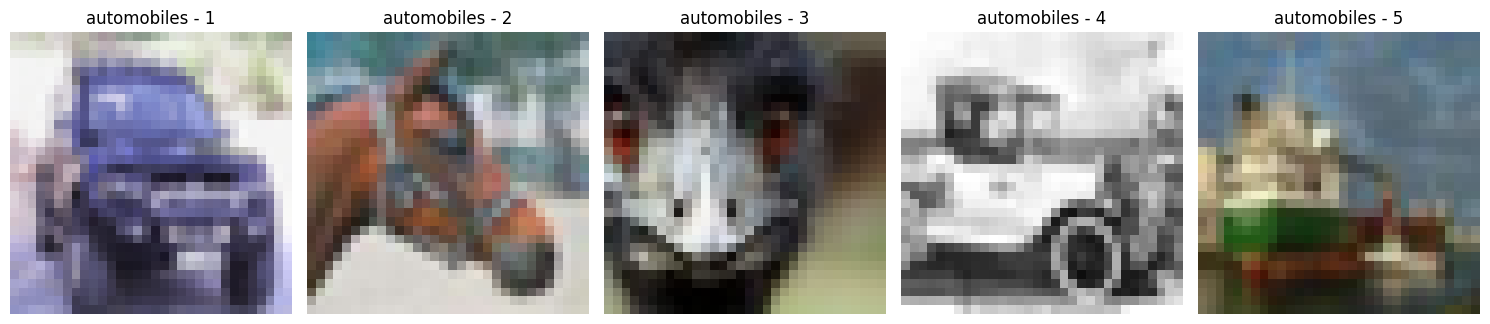

Bottom 5 predictions for class automobiles:


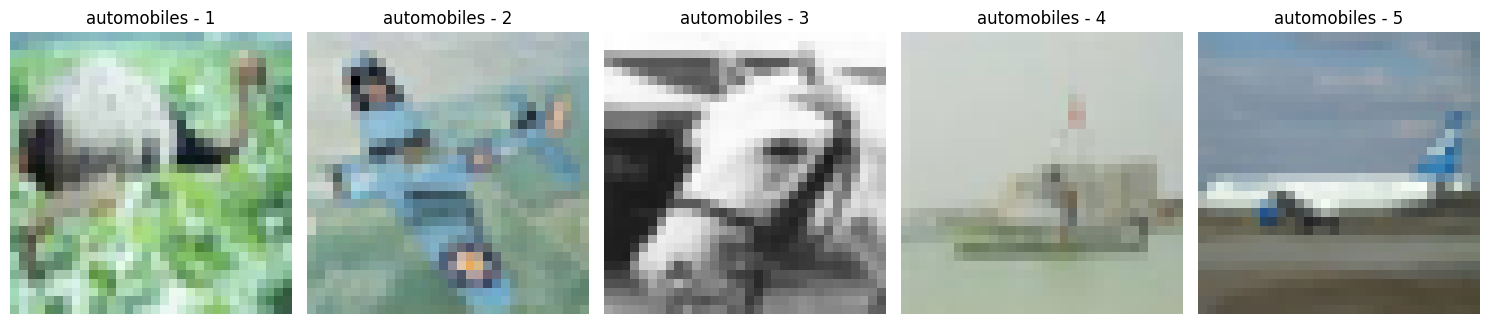

In [57]:
k = 5
for i, class_index in enumerate(class_names):
    print(f"Top 5 predictions for class {class_index}:")
    top5_indices = []
    for idx, image in enumerate(classified):
        if image == i:
            top5_indices.append(idx)
        if len(top5_indices) == 5:
            break

    fig, axes = plt.subplots(1, k, figsize=(15, 4))    
    for j, idx in enumerate(top5_indices):
        ax = axes[j]
        image_data = test_data[idx]
        ax.imshow(image_data)
        ax.axis('off')
        ax.set_title(f'{class_index} - {j+1}')

    plt.tight_layout()
    plt.show()

    print(f"Bottom 5 predictions for class {class_index}:")

    bottom5_indices = []
    for idx, image in enumerate(classified[::-1]):
        if image == i:
            bottom5_indices.append(len(classified)-idx-1)
        if len(bottom5_indices) == 5:
            break

    fig, axes = plt.subplots(1, k, figsize=(15, 4))    
    for j, idx in enumerate(bottom5_indices):
        # print(j)
        # print(idx)
        ax = axes[j]
        image_data = test_data[idx]
        ax.imshow(image_data)
        ax.axis('off')
        ax.set_title(f'{class_index} - {j+1}')

    plt.tight_layout()
    plt.show()
    print('\n')

 # Individual Contribution Report *(Mandatory)*

Because we want each student to contribute fairly to the submitted work, we ask you to fill out the textcells below. Write down your contribution to each of the assignment components in percentages. Naturally, percentages for one particular component should add up to 100% (e.g. 30% - 30% - 40%). No further explanation has to be given.

Name:

Contribution on research: \
Contribution on programming: \
Contribution on writing:

Name:

Contribution on research: \
Contribution on programming: \
Contribution on writing:

Name:

Contribution on research: \
Contribution on programming: \
Contribution on writing:

Name:

Contribution on research: \
Contribution on programming: \
Contribution on writing:

 # -End of Notebook-